In [5]:
import ugradio
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift
from scipy import signal as sig
from scipy.stats import norm, linregress
from scipy.optimize import curve_fit
from uncertainties import ufloat

In [6]:
# Consistent Plot Params
titleSize = 13
axisSize = 13
graphSizeSingle = (8, 6)
graphSizeDouble = (15, 6)

In [7]:
# Data Extraction Helper Funcs
def extractRawData(folder, filename):
    prefix = "ugastro\\Lab2Data\\" + folder
    raw_data = np.load(prefix + filename)
    return raw_data

def getDataBlocks(data, num_blocks=None, window=None):
    if not window:
        window = len(data['time_data'][1])
    if not num_blocks:
        num_blocks = len(data['time_data']) - 1
    
    new_data = np.zeros((num_blocks, window), dtype=complex)
    for i, block in enumerate(data['time_data'][1:num_blocks+1]):
        real = block[:window, 0]
        imag = block[:window, 1]
        new_data[i] = normalize(real + (1j * imag))
        #new_data[i] = real + (1j * imag)
    return new_data

def getDataSingleBlock(data, block=1):
    real = data['time_data'][block][:, 0]
    imag = data['time_data'][block][:, 1]
    return normalize(real + (1j * imag))

def getSampleRate(data):
    return data['sample_rate']

def getGain(data):
    return data['gain']

def getUTC(data):
    return data['utc']

def getJulianDate(data):
    return data['jd']

def windowData(data):
    return data[:]

def normalize(data):
    return (data - np.mean(data)) #/ np.std(data)

def getTimes(N, sample_rate=3.1e6):
    return [i / sample_rate for i in range(0, N)]

times = [i / 1e3 for i in range(0, 1024)]

In [35]:
# Extracting Data

# 6.2.1
folder = "Section6_2\\6_2_1\\"
#data_rf_off_test = extractRawData(folder, "rf_off_test.npz")
#data_rf_on_test = extractRawData(folder, "rf_on_test.npz")


# 6.2.2
folder = "Section6_2\\6_2_2\\"
data_LSB = extractRawData(folder, "LSB_10000.npz")
data_USB = extractRawData(folder, "USB_10000.npz")


# 6.2.3
folder = "Section6_2\\6_2_3\\"
data_coldsky = extractRawData(folder, "Coldsky_10000.npz")
data_humans = extractRawData(folder, "Humanbody_10000.npz")


# 8
folder = "Section8\\"
data_LSB_aimed = extractRawData(folder, "LSB.npz")
data_USB_aimed = extractRawData(folder, "USB.npz")


# 9.2
folder = "Section9\\Section9_2\\"
data_100mV_short = extractRawData(folder, "voltcount_100mV.npz")
data_100mV_long = extractRawData(folder, "voltcount_100mV_long_cable.npz")
data_200mV_short = extractRawData(folder, "voltcount_200mV.npz")
data_200mV_long = extractRawData(folder, "voltcount_200mV_long_cable.npz")
data_300mV_short = extractRawData(folder, "voltcount_300mV.npz")
data_300mV_long = extractRawData(folder, "voltcount_300mV_long_cable.npz")
data_400mV_short = extractRawData(folder, "voltcount_400mV.npz")
data_400mV_long = extractRawData(folder, "voltcount_400mV_long_cable.npz")
data_500mV_short = extractRawData(folder, "voltcount_500mV.npz")
data_500mV_long = extractRawData(folder, "voltcount_500mV_long_cable.npz")

data_10mV = extractRawData(folder, "Mar3_10mV.npz")
data_15mV = extractRawData(folder, "Mar3_15mV.npz")
data_20mV = extractRawData(folder, "Mar3_20mV.npz")
data_25mV = extractRawData(folder, "Mar3_25mV.npz")
data_30mV = extractRawData(folder, "Mar3_30mV.npz")
data_35mV = extractRawData(folder, "Mar3_35mV.npz")
data_40mV = extractRawData(folder, "Mar3_40mV.npz")
data_45mV = extractRawData(folder, "Mar3_45mV.npz")

data_10mV_long = extractRawData(folder, "Mar3_longcable_10mV.npz")
data_15mV_long = extractRawData(folder, "Mar3_longcable_15mV.npz")
data_20mV_long = extractRawData(folder, "Mar3_longcable_20mV.npz")
data_25mV_long = extractRawData(folder, "Mar3_longcable_25mV.npz")
data_30mV_long = extractRawData(folder, "Mar3_longcable_30mV.npz")
data_35mV_long = extractRawData(folder, "Mar3_longcable_35mV.npz")
data_40mV_long = extractRawData(folder, "Mar3_longcable_40mV.npz")
data_45mV_long = extractRawData(folder, "Mar3_longcable_45mV.npz")

# Bad Data
data_50mV = extractRawData(folder, "Mar3_50mV.npz")
data_75mV = extractRawData(folder, "Mar3_75mV.npz")
data_100mV = extractRawData(folder, "Mar3_100mV.npz")
data_125mV = extractRawData(folder, "Mar3_125mV.npz")
data_150mV = extractRawData(folder, "Mar3_150mV.npz")
data_175mV = extractRawData(folder, "Mar3_175mV.npz")
data_200mV = extractRawData(folder, "Mar3_200mV.npz")
data_225mV = extractRawData(folder, "Mar3_225mV.npz")
data_250mV = extractRawData(folder, "Mar3_250mV.npz")


# 9.3
folder = "Section9\\Section9_3\\"
data_bp_10mV = extractRawData(folder, "Mar3_bandpass_10mV.npz")
data_bp_20mV = extractRawData(folder, "Mar3_bandpass_20mV.npz")
data_bp_30mV = extractRawData(folder, "Mar3_bandpass_30mV.npz")
data_bp_40mV = extractRawData(folder, "Mar3_bandpass_40mV.npz")
data_bp_50mV = extractRawData(folder, "Mar3_bandpass_50mV.npz")
data_bp_60mV = extractRawData(folder, "Mar3_bandpass_60mV.npz")
data_bp_70mV = extractRawData(folder, "Mar3_bandpass_70mV.npz")
data_bp_80mV = extractRawData(folder, "Mar3_bandpass_80mV.npz")
data_bp_90mV = extractRawData(folder, "Mar3_bandpass_90mV.npz")
data_bp_100mV = extractRawData(folder, "Mar3_bandpass_100mV.npz")


In [9]:
def graphOverlayTimeData(datasets, labels, signal, sample_rate=3.1e6, xlim=None):
    plt.figure(figsize=graphSizeSingle)
    times = getTimes(len(datasets[0]), sample_rate)

    for i, data in enumerate(datasets):
        plt.plot(times, data, label=labels[i], alpha=0.5)
        plt.scatter(times, data, s=10, alpha=0.5)

    plt.xlabel("Time (ms)", fontsize=axisSize)
    plt.xlim(xlim)
    plt.ylabel("Voltage Counts (Arbitrary Scale)", fontsize=axisSize)
    plt.title(f"{signal} Signals w/ 3.1 MHz Sample Rate", size=titleSize)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

In [10]:
def graphOverlayPowerSpectra(datasets, sample_rates, labels, signal, multiple=True, xlim=None):
    plt.figure(figsize=graphSizeSingle)
    mid = len(datasets[0]) // 2

    for i, data in enumerate(datasets):
        a = 1 if i == 0 else 0.1
        factor = 1
        c = "red" if i == 0 else "blue"
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rates[i]))

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        print(len(power_spectrum))
        plt.plot(freq_bins / 1e3, power_spectrum / factor, label=f"{labels[i]}", alpha=1, color=c)

    plt.xlim(xlim)
    plt.xlabel("Frequency (kHz)", fontsize=axisSize)
    plt.ylabel("Power (Arbitary Scale)", fontsize=axisSize)
    plt.title(f"One Sided Power Spectra of {signal} Signals", size=titleSize)
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def graphAvgPowerSpectra(USB_blocks, LSB_blocks, sample_rate, center_freqs, xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)
    avg_power_USB = np.zeros(len(USB_blocks[0]))
    avg_power_LSB = np.zeros(len(USB_blocks[0]))

    for data in USB_blocks:
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

        avg_power_USB += (abs(fft_data_shifted) ** 2)
        
    for data in LSB_blocks:
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

        avg_power_LSB += (abs(fft_data_shifted) ** 2)
        
    avg_power_USB /= len(USB_blocks)
    avg_power_LSB /= len(LSB_blocks)

    factor = 150
    plt.plot(freq_bins / 1e3, (avg_power_USB - avg_power_LSB) / factor, label=f"USB (center freq {center_freqs[0]})", alpha=1)
    plt.plot(freq_bins / 1e3, (avg_power_LSB - avg_power_USB) / factor, label = f"LSB (center freq {center_freqs[1]})", alpha=1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (kHz)", fontsize=axisSize)
    plt.ylabel("Power (Arbitary Scale)", fontsize=axisSize)
    plt.title(f"Power Spectra of USB and LSB ", size=titleSize)
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def graphAvgPowerSpectraLines(USB_blocks, LSB_blocks, sample_rate, xlim=None, ylim=None):
    fig, axs = plt.subplots(1, 2, figsize=graphSizeDouble)

    power_on = np.zeros((len(USB_blocks), len(USB_blocks[0])))
    power_off = np.zeros((len(USB_blocks), len(USB_blocks[0])))
    mid = len(USB_blocks[0]) // 2

    for i, data in enumerate(LSB_blocks):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

        power_on[i][:mid] = (abs(fft_data_shifted) ** 2)[:mid]
        power_off[i][mid:] = (abs(fft_data_shifted) ** 2)[mid:]
        
    for j, data in enumerate(USB_blocks):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

        power_on[j][mid:] = (abs(fft_data_shifted) ** 2)[mid:]
        power_off[j][:mid] = (abs(fft_data_shifted) ** 2)[:mid]

    avg_on_mean = np.mean(power_on, axis=0)
    avg_on_median = np.median(power_on, axis=0)
    avg_off_mean = np.mean(power_off, axis=0)
    avg_off_median = np.median(power_off, axis=0)  

    avg_on_mean[len(avg_on_mean)//2] = avg_on_mean[len(avg_on_mean)//2 - 1]
    avg_on_mean[len(avg_on_mean)//2 + 1] = avg_on_mean[len(avg_on_mean)//2 + 2]

    avg_off_mean[len(avg_off_mean)//2] = avg_off_mean[len(avg_off_mean)//2 - 1]
    avg_off_mean[len(avg_off_mean)//2 + 1] = avg_off_mean[len(avg_off_mean)//2 + 2]

    tau_line_mean = avg_on_mean / avg_off_mean
    tau_line_median = avg_on_median / avg_off_median

    factor = 150
    axs[0].plot(freq_bins / 1e3, avg_on_mean / factor, label="on-line w/ np.mean()", alpha=1)
    axs[1].plot(freq_bins / 1e3, avg_on_median / factor, label="on-line w/ np.median()", alpha=1)
    axs[0].plot(freq_bins / 1e3, avg_off_mean / factor, label="off-line w/ np.mean()", alpha=0.8)
    axs[1].plot(freq_bins / 1e3, avg_off_median / factor, label="off-line w/ np.median()", alpha=0.8)

    axs[0].set_xlim(xlim)
    axs[0].set_ylim(ylim)
    axs[1].set_xlim(xlim)
    axs[1].set_ylim(ylim)

    axs[0].set_xlabel("Frequency (kHz)", fontsize=axisSize)
    axs[1].set_xlabel("Frequency (kHz)", fontsize=axisSize)
    axs[0].set_ylabel("Power (Arbitary Scale)", fontsize=axisSize)
    axs[1].set_ylabel("Power (Arbitary Scale)", fontsize=axisSize)

    axs[0].set_title(f"On-/Off-line Power Spectra from USB and LSB ", size=titleSize)
    axs[1].set_title(f"On-/Off-line Power Spectra from USB and LSB ", size=titleSize)

    axs[0].legend()
    axs[1].legend()
    axs[0].grid(True)
    axs[1].grid(True)
    plt.show()

    return tau_line_mean, tau_line_median

def graphAvgPowerSpectraLinesSingle(USB_blocks, LSB_blocks, sample_rate, xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)

    power_on = np.zeros((len(USB_blocks), len(USB_blocks[0])))
    power_off = np.zeros((len(USB_blocks), len(USB_blocks[0])))
    mid = len(USB_blocks[0]) // 2

    for i, data in enumerate(LSB_blocks):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

        power_on[i][:mid] = (abs(fft_data_shifted) ** 2)[:mid]
        power_off[i][mid:] = (abs(fft_data_shifted) ** 2)[mid:]
        
    for j, data in enumerate(USB_blocks):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

        power_on[j][mid:] = (abs(fft_data_shifted) ** 2)[mid:]
        power_off[j][:mid] = (abs(fft_data_shifted) ** 2)[:mid]

    avg_on_mean = np.mean(power_on, axis=0)
    avg_on_median = np.median(power_on, axis=0)
    avg_off_mean = np.mean(power_off, axis=0)
    avg_off_median = np.median(power_off, axis=0)

    avg_on_mean[len(avg_on_mean)//2] = avg_on_mean[len(avg_on_mean)//2 - 1]
    avg_on_mean[len(avg_on_mean)//2 + 1] = avg_on_mean[len(avg_on_mean)//2 + 2]

    avg_off_mean[len(avg_off_mean)//2] = avg_off_mean[len(avg_off_mean)//2 - 1]
    avg_off_mean[len(avg_off_mean)//2 + 1] = avg_off_mean[len(avg_off_mean)//2 + 2]

    tau_line_mean = avg_on_mean / avg_off_mean
    tau_line_median = avg_on_median / avg_off_median
    factor = 150

    plt.plot(freq_bins / 1e6, avg_on_mean / factor, label="on-line", alpha=1)
    plt.plot(freq_bins / 1e6, avg_off_mean / factor, label="off-line", alpha=1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power (Arbitrary Scale)")
    plt.title(f"On-/Off-line Power Spectra versus IF Frequency ", size=titleSize)
    plt.legend()
    plt.grid()
    plt.show()

    return tau_line_mean, tau_line_median

def graphPowerSpectraRF(USB_blocks, LSB_blocks, sample_rate, xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)

    power_LSB = np.zeros((len(USB_blocks), len(USB_blocks[0])))
    power_USB = np.zeros((len(USB_blocks), len(USB_blocks[0])))
    mid = len(USB_blocks[0]) // 2
    freq_bins = fftshift(fftfreq(len(USB_blocks[0]), d=1/sample_rate))

    for i, data in enumerate(LSB_blocks):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        power_LSB[i] = (abs(fft_data_shifted) ** 2)

    for i, data in enumerate(USB_blocks):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        power_USB[i] = (abs(fft_data_shifted) ** 2)

    avg_LSB_mean = np.mean(power_LSB, axis=0)
    avg_USB_mean = np.mean(power_USB, axis=0)

    avg_LSB_mean[len(avg_LSB_mean)//2] = avg_LSB_mean[len(avg_LSB_mean)//2 - 1]
    avg_LSB_mean[len(avg_LSB_mean)//2 + 1] = avg_LSB_mean[len(avg_LSB_mean)//2 + 2]

    avg_USB_mean[len(avg_USB_mean)//2] = avg_USB_mean[len(avg_USB_mean)//2 - 1]
    avg_USB_mean[len(avg_USB_mean)//2 + 1] = avg_USB_mean[len(avg_USB_mean)//2 + 2]

    factor = 150
    plt.plot((freq_bins + 1420.81e6) / 1e6, avg_LSB_mean / factor, label="LSB", alpha=1)
    plt.plot((freq_bins + 1420e6)/ 1e6, avg_USB_mean / factor, label="USB", alpha=1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power (Arbitrary Scale)")
    plt.title(f"USB/LSB Power Spectra versus RF Frequency ", size=titleSize)
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
def graphSingleGaussianHistogram(data, sample_rate, signals, num_bins):
    # Check block size first
    plt.figure(figsize=graphSizeSingle)

    bins = np.linspace(min(data), max(data), num_bins)
    plt.hist(data, bins=num_bins, density=True, alpha=1, label="Sampled Data")

    gaussian_fit = norm.pdf(bins, np.mean(data), np.std(data))
    plt.plot(bins, gaussian_fit, 'r--', linewidth=5, label="Gaussian Fit")

    plt.xlabel("Measured Voltage / Counts", fontsize=axisSize)
    plt.ylabel("Probability Density", fontsize=axisSize)
    plt.title(f"Noise of {signals} Signal w/ {sample_rate} & {num_bins} bins", size=titleSize)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [14]:
def graphTauLines(tau_mean, tau_median, sample_rate, xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)

    freq_bins = fftshift(fftfreq(len(tau_mean), d=1/sample_rate))

    plt.plot(freq_bins / 1e6, tau_mean, label=r"$\tau_{line}$ (mean)")
    plt.plot(freq_bins / 1e6, tau_median, label=r"$\tau_{line}$ (median)", alpha=0.7)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (MHz)", fontsize=axisSize)
    plt.ylabel("Ratio (Arbitary Scale)", fontsize=axisSize)
    plt.title(f"Line Shape of On-Line / Off-Line Ratio versus IF Frequency", size=titleSize)
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
def computeCalibratedGain(coldsky, humans, T_cal=300):
    N = len(coldsky[0])
    
    avg_coldsky = np.mean(abs(fft(coldsky, axis=1) / N) ** 2, axis=0)
    avg_humans = np.mean(abs(fft(humans, axis=1) / N) ** 2, axis=0)

    avg_coldsky[len(avg_coldsky)//2] = avg_coldsky[len(avg_coldsky)//2 - 1]
    avg_coldsky[len(avg_coldsky)//2 + 1] = avg_coldsky[len(avg_coldsky)//2 + 2]

    avg_humans[len(avg_humans)//2] = avg_humans[len(avg_humans)//2 - 1]
    avg_humans[len(avg_humans)//2 + 1] = avg_humans[len(avg_humans)//2 + 2]

    bottom_sum = np.sum(avg_humans - avg_coldsky)
    coldsky_sum = np.sum(avg_coldsky)

    return (T_cal * coldsky_sum) / bottom_sum

In [16]:
def gaussian(X, amp, mean, stddev):
    return amp * np.exp(-((X - mean) ** 2) / (2 * stddev ** 2))

def bimodal_gaussian(X, amp1, mean1, stddev1, amp2, mean2, stddev2):
    return (amp1 * np.exp(-((X - mean1) ** 2) / (2 * stddev1 ** 2)) + amp2 * np.exp(-((X - mean2) ** 2) / (2 * stddev2 ** 2)))

def fit_gaussians(freq_bins, T, guess1=[41, 1420.32, 0.05], guess2=[20, 1420.45, 0.07], doppler=False):
    if doppler: 
        peak1_mask = (freq_bins > -80000) & (freq_bins < 0)
        peak2_mask = (freq_bins > 0) & (freq_bins < 50000)
    else:
        peak1_mask = (freq_bins > 1420.25) & (freq_bins < 1420.45)
        peak2_mask = (freq_bins > 1420.45) & (freq_bins < 1420.8)

    #print(freq_bins)
    #print(peak1_mask)
    # [amplitude, center, width]
    gaussian1, cov1 = curve_fit(gaussian, freq_bins[peak1_mask], T[peak1_mask], p0=guess1)
    gaussian2, cov2 = curve_fit(gaussian, freq_bins[peak2_mask], T[peak2_mask], p0=guess2)
    bimodal, covB = curve_fit(bimodal_gaussian, freq_bins, T, p0=guess1+guess2)
    
    return gaussian1, gaussian2, bimodal, covB

def graphCalibratedPolyFitGaussian(T, xlim=None, ylim=None, IF=False):
    plt.figure(figsize=graphSizeSingle)

    clipped_T = T[len(T)//2:]
    clipped_T[0] = clipped_T[1]
    freq_bins = np.linspace(1420, 1421.5, len(clipped_T))
    
    if IF:
        freq_bins -= 1420.405
        type = "IF"
    else:
        type = "RF"
    
    mask_offline = ((freq_bins < 1420.25) | (freq_bins > 1420.8))
    freq_offline = freq_bins[mask_offline]
    T_offline = clipped_T[mask_offline]
    poly_coeffs = np.polyfit(freq_offline, T_offline, 3) 
    poly_baseline = np.polyval(poly_coeffs, freq_bins)
    corrected_spectrum = clipped_T - poly_baseline
    
    gaussian1, gaussian2, bimodal = fit_gaussians(freq_bins, corrected_spectrum)
    print("[amplitude, center, width]")
    print(f"gaussian1 params = {gaussian1}")
    print(f"gaussian2 params = {gaussian2}")
    fitted_g1 = gaussian(freq_bins, *gaussian1)
    fitted_g2 = gaussian(freq_bins, *gaussian2)
    fitted_bimodal = bimodal_gaussian(freq_bins, *bimodal)

    plt.plot(freq_bins, corrected_spectrum, label='Corrected Spectrum', alpha=0.7)
    plt.plot(freq_bins, fitted_g1, label='Gaussian Fit 1', linestyle='dashed', linewidth=3)
    plt.plot(freq_bins, fitted_g2, label='Gaussian Fit 2', linestyle='dashed', linewidth=3, color="red")
    plt.plot(freq_bins, fitted_bimodal, label='Bimodal Gaussian Fit', linestyle='dashed', linewidth=3)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (MHz)", fontsize=axisSize)
    plt.ylabel("Temperature (K)", fontsize=axisSize)
    plt.title(f"Calibrated T Spectrum versus {type} Frequency w/ Baseline Polyfit & Gaussian Fits", size=titleSize)
    plt.legend()
    plt.grid()
    plt.show()

In [17]:
def graphCalibratedT(T, xlim=None, ylim=None, IF=False):
    plt.figure(figsize=graphSizeSingle)

    clipped_T = T[len(T)//2:]
    freq_bins = np.linspace(1420, 1421.5, len(clipped_T))

    if IF:
        freq_bins -= 1420.405
        type = "IF"
    else:
        type = "RF"

    plt.plot(freq_bins, clipped_T)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (MHz)", fontsize=axisSize)
    plt.ylabel("Temperature (K)", fontsize=axisSize)
    plt.title(f"Calibrated T Spectrum versus {type} Frequency", size=titleSize)
    plt.grid()
    plt.show()

def graphCalibratedTDoppler(T, correction=0, xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)
    c = 2.997e8

    clipped_T = T[len(T)//2:-10]
    clipped_T[0] = clipped_T[1]
    freq_bins = np.linspace(1420, 1421.5, len(clipped_T))
    naive_v = (c * (-(freq_bins - 1420.405) / 1420.405))
    if correction:
        corr_v = (c * (-(freq_bins - 1420.405) / 1420.405)) - correction
        mask = ((corr_v < -60000) | (corr_v > 50000))
        poly_coeffs = np.polyfit(corr_v[mask], clipped_T[mask], 3)
        poly_baseline_c = np.polyval(poly_coeffs, corr_v)
    
    mask = ((naive_v < -80000) | (naive_v > 40000))
    poly_coeffs = np.polyfit(naive_v[mask], clipped_T[mask], 3)
    poly_baseline = np.polyval(poly_coeffs, naive_v)

    print(f"poly_coeffs = {poly_coeffs}")
    print(f"poly_baseline = {poly_baseline}")
    
    plt.plot(naive_v / 1e3, clipped_T - poly_baseline, label="Observed Doppler Velocities")

    if correction:
        plt.plot(corr_v / 1e3, clipped_T - poly_baseline_c, label="Corrected to LSR", alpha=0.7)
        
    # [amplitude, center, width]
    guess1, guess2 = [20, -25000, 30000], [40, 20000, 20000]    
    gaussian1, gaussian2, bimodal = fit_gaussians(corr_v, clipped_T - poly_baseline_c, guess1, guess2, doppler=True)
    print("[amplitude, center, width]")
    print(f"gaussian1 params = {gaussian1}")
    print(f"gaussian2 params = {gaussian2}")
    fitted_g1 = gaussian(corr_v, *gaussian1)
    fitted_g2 = gaussian(corr_v, *gaussian2)
    fitted_bimodal = bimodal_gaussian(corr_v, *bimodal)

    plt.plot(corr_v / 1e3, fitted_g1, label='Gaussian Fit 1', linestyle='dashed', linewidth=2, alpha=0.7)
    plt.plot(corr_v / 1e3, fitted_g2, label='Gaussian Fit 2', linestyle='dashed', linewidth=2, alpha=0.7, color="red")
    plt.plot(corr_v / 1e3, fitted_bimodal, label='Bimodal Gaussian Fit', linestyle='dashed', linewidth=2, alpha=0.7, color="purple")

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Doppler Velocity (km/s)", fontsize=axisSize)
    plt.ylabel("Temperature (K)", fontsize=axisSize)
    if correction:
        plt.title("Calibrated T Spectrum versus Doppler Velocity After Correction", size=titleSize)
    else:
        plt.title("Calibrated T Spectrum versus Doppler Velocity", size=titleSize)
    plt.grid()
    plt.legend()
    plt.show()

def graphCalibratedTDoppler2(T, correction=0, xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)
    c = 2.997e8  # Speed of light in m/s

    clipped_T = T[len(T)//2:-10]
    clipped_T[0] = clipped_T[1]
    freq_bins = np.linspace(1420, 1421.5, len(clipped_T))  # RF Frequency bins in MHz
    naive_v = (c * (-(freq_bins - 1420.405) / 1420.405))  # Convert to Doppler velocity

    if correction:
        corr_v = (c * (-(freq_bins - 1420.405) / 1420.405)) - correction
        mask = ((corr_v < -60000) | (corr_v > 50000))
        poly_coeffs = np.polyfit(corr_v[mask], clipped_T[mask], 3)
        poly_baseline_c = np.polyval(poly_coeffs, corr_v)
    
    mask = ((naive_v < -80000) | (naive_v > 40000))
    poly_coeffs = np.polyfit(naive_v[mask], clipped_T[mask], 3)
    poly_baseline = np.polyval(poly_coeffs, naive_v)

    print(f"poly_coeffs = {poly_coeffs}")
    # Compute residuals between observed spectrum and low-order polynomial baseline
    baseline_residuals = clipped_T - poly_baseline_c

    # Estimate noise level (standard deviation of residuals)
    sigma_baseline = np.std(baseline_residuals)

    # Compute chi-squared
    chi_squared_baseline = np.sum((baseline_residuals / sigma_baseline) ** 2)
    print(f"Chi-squared (baseline fit): {chi_squared_baseline}")

    p_poly = len(poly_coeffs)

    # Compute reduced chi-squared
    reduced_chi_squared_baseline = chi_squared_baseline / (len(clipped_T[mask]) - p_poly)
    print(f"Reduced Chi-squared (baseline fit): {reduced_chi_squared_baseline}")

    
    fig, ax1 = plt.subplots(figsize=graphSizeSingle)

    # Primary x-axis (Doppler Velocity)
    ax1.plot(naive_v / 1e3, clipped_T - poly_baseline, label="Observed Doppler Velocities")
    if correction:
        ax1.plot(corr_v / 1e3, clipped_T - poly_baseline_c, label="Corrected to LSR", alpha=0.7)

    # Gaussian fits
    guess1, guess2 = [20, -25000, 30000], [40, 20000, 20000]    
    gaussian1, gaussian2, bimodal, covB = fit_gaussians(corr_v, clipped_T - poly_baseline_c, guess1, guess2, doppler=True)
    
    print("[amplitude, center, width]")
    print(f"gaussian1 params = {gaussian1}")
    print(f"gaussian2 params = {gaussian2}")
    
    fitted_g1 = gaussian(corr_v, *gaussian1)
    fitted_g2 = gaussian(corr_v, *gaussian2)
    fitted_bimodal = bimodal_gaussian(corr_v, *bimodal)

    parameter_errors = np.sqrt(np.diag(covB)) #1-sigma errors
    for i, (param, error) in enumerate(zip(bimodal, parameter_errors)):
        print(f"Parameter {i}: {ufloat(param, error)}")

    residuals = clipped_T - poly_baseline_c - fitted_bimodal

    ax1.plot(corr_v / 1e3, residuals, label="Residuals", linewidth=2, alpha=0.6, color="green")

    ax1.plot(corr_v / 1e3, fitted_g1, label='Gaussian Fit 1', linestyle='dashed', linewidth=2, alpha=0.7)
    ax1.plot(corr_v / 1e3, fitted_g2, label='Gaussian Fit 2', linestyle='dashed', linewidth=2, alpha=0.7, color="red")
    ax1.plot(corr_v / 1e3, fitted_bimodal, label='Bimodal Gaussian Fit', linestyle='dashed', linewidth=2, alpha=0.7, color="purple")

    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    ax1.set_xlabel("Doppler Velocity (km/s)", fontsize=axisSize)
    ax1.set_ylabel("Temperature (K)", fontsize=axisSize)
    
    if correction:
        ax1.set_title("Calibrated T Spectrum versus Doppler Velocity", size=titleSize)
    else:
        ax1.set_title("Calibrated T Spectrum versus Doppler Velocity", size=titleSize)

    ax1.grid()
    ax1.legend()


    print(f"naive peaks = {naive_v[126]} and {naive_v[196]}")
    print(np.argmax((clipped_T - poly_baseline)[150:]))

    print(f"corrected peak = {corr_v[np.argmax(clipped_T - poly_baseline_c)]}")
    print(corr_v[np.argmax(clipped_T - poly_baseline_c)] - naive_v[126])

    sigma = np.std(residuals) 

    chi_squared = np.sum((residuals / sigma) ** 2)
    print(f"Chi-squared: {chi_squared}")

    N = len(clipped_T)
    p = len(bimodal) 

    reduced_chi_squared = chi_squared / (N - p)
    print(f"Reduced Chi-squared: {reduced_chi_squared}")

    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())  

    def velocity_to_frequency(v_km_s):
        return 1420.405 * (1 - v_km_s / (c / 1e3)) 

    freq_ticks = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], num=7)  # Adjust tick count if needed
    freq_labels = [f"{velocity_to_frequency(v):.3f}" for v in freq_ticks]

    ax2.set_xticks(freq_ticks)
    ax2.set_xticklabels(freq_labels)
    ax2.set_xlabel("RF Frequency (MHz)", fontsize=axisSize)

    plt.show()

def graphCalibratedTPolyfit(T, xlim=None, ylim=None, IF=False):
    plt.figure(figsize=graphSizeSingle)

    clipped_T = T[len(T)//2:]
    clipped_T[0] = clipped_T[1]
    freq_bins = np.linspace(1420, 1421.5, len(clipped_T))

    if IF:
        freq_bins -= 1420.405
        type = "IF"
    else:
        type = "RF"

    mask_offline = ((freq_bins < 1420.25) | (freq_bins > 1420.8))
    freq_offline = freq_bins[mask_offline]
    T_offline = clipped_T[mask_offline]
    poly_coeffs = np.polyfit(freq_offline, T_offline, 2) 
    poly_baseline = np.polyval(poly_coeffs, freq_bins)

    corrected_spectrum = clipped_T - poly_baseline

    plt.plot(freq_bins, corrected_spectrum)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (MHz)", fontsize=axisSize)
    plt.ylabel("Temperature (K)", fontsize=axisSize)
    plt.title(f"Calibrated T Spectrum versus {type} Frequency w/ Baseline Polyfit", size=titleSize)
    plt.grid()
    plt.show()

In [18]:
USB = getDataBlocks(data_USB)
LSB = getDataBlocks(data_LSB)
sample_rate = 3.1e6
center_freqs = ["1.420 GHz", "1.421 GHz"]

C:\Users\brand\AppData\Local\Temp\ipykernel_17904\2297932276.py:100: RuntimeWarning: invalid value encountered in divide
  tau_line_median = avg_on_median / avg_off_median


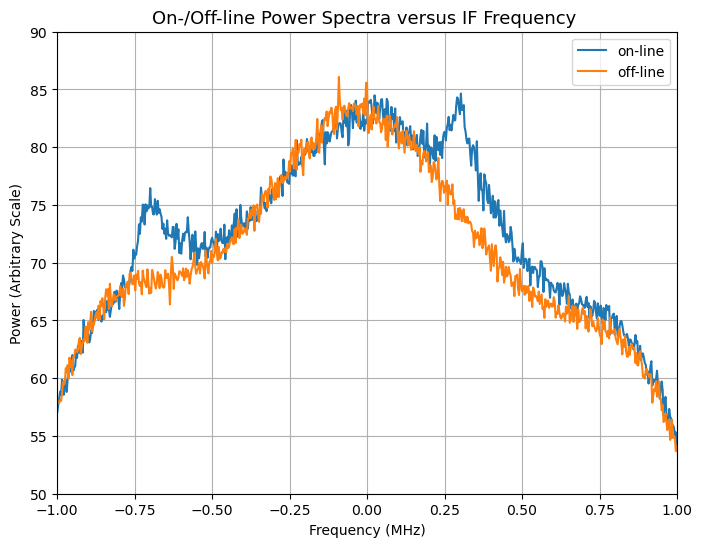

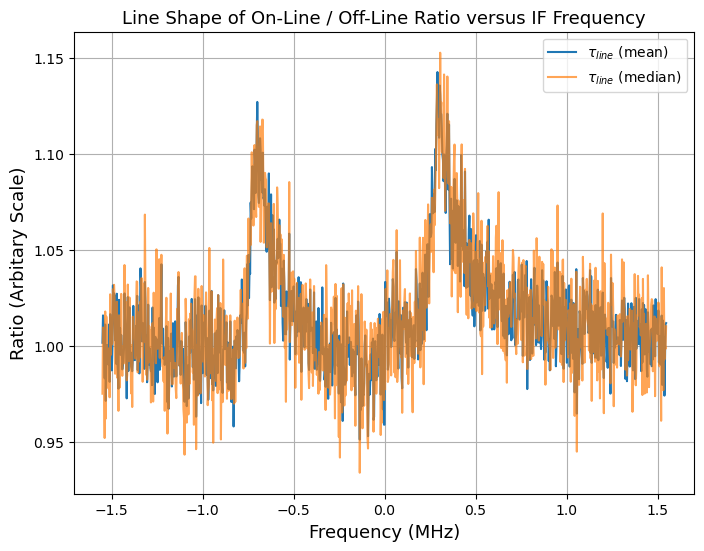

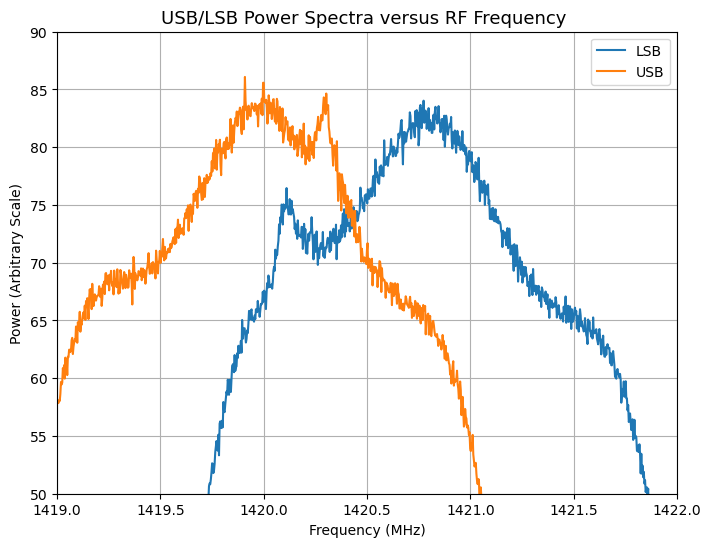

In [19]:
tau_mean, tau_median = graphAvgPowerSpectraLinesSingle(USB, LSB, sample_rate, xlim=(-1, 1), ylim=(50, 90))
graphTauLines(tau_mean, tau_median, sample_rate)
graphPowerSpectraRF(USB, LSB, sample_rate, xlim=(1419, 1422), ylim=(50, 90))

G = 127.366
Peak = 1420.285


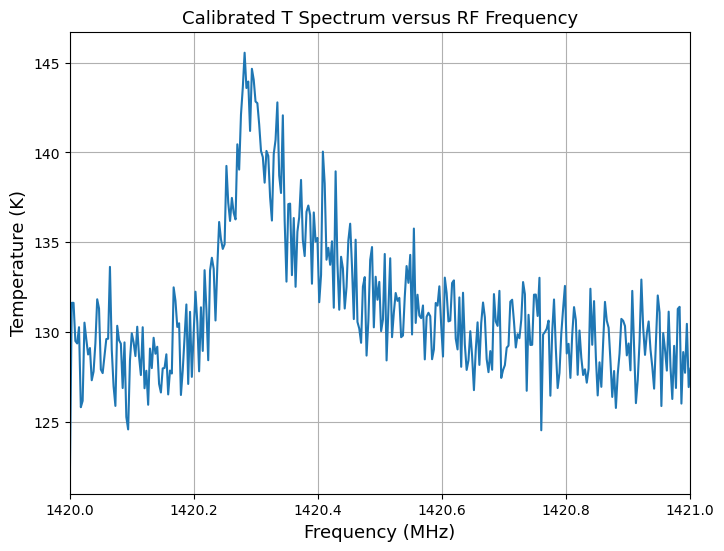

In [20]:
coldsky = getDataBlocks(data_coldsky)
humans = getDataBlocks(data_humans)

G = computeCalibratedGain(coldsky, humans, 300)
print(f"G = {round(G, 3)}")
T = tau_mean * G

clipped_T = T[len(T)//2:]
clipped_T.argmax()
print(f"Peak = {round(np.linspace(1420, 1421.5, len(clipped_T))[97], 3)}")

graphCalibratedT(T, xlim=(1420, 1421))
#graphCalibratedTDoppler(T, xlim=(-60, 60))

In [21]:
# Time Helper Functions
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, FK5, Galactic, ICRS, Angle
import astropy.units as units
from datetime import datetime

def pstToUTC(day, month, year, hour, min, sec):
    # Does not fully account for converting to next month 
    if hour + 8 >= 24:
        day += 1
        hour = hour + 8 - 24
    return datetime(year, month, day, hour, min, sec)

def formatTime(time_utc):
    return Time(str(datetime.strptime(str(time_utc), "%a %b %d %H:%M:%S %Y")), format="iso")

def horizontalToEquitorial(az, alt, time_utc, lat=37.873199, lon=-122.2573):
    location = EarthLocation(lat=lat*units.deg, lon=lon*units.deg)
    obstime = formatTime(time_utc)
    coord = AltAz(az=az*units.deg, alt=alt*units.deg, obstime=obstime, location=location)
    equitorial = coord.transform_to(ICRS())
    return equitorial.ra.deg, equitorial.dec.deg

def galacticToHorizontal(l, b, time_utc, lat=37.873199, lon=-122.2573):
    location = EarthLocation(lat=lat*units.deg, lon=lon*units.deg)
    obstime = formatTime(time_utc)
    galactic = Galactic(l=l*units.deg, b=b*units.deg)
    equitorial = galactic.transform_to(ICRS())
    horizontal = equitorial.transform_to(AltAz(obstime=obstime, location=location))
    return horizontal.az.deg, horizontal.alt.deg

In [22]:
time_utc = getUTC(data_coldsky)
print(f"jd = {getJulianDate(data_coldsky)}")
jd = 2460719.503247367
ra, dec = horizontalToEquitorial(0, 90, time_utc)

print(f"ra = {ra}")
print(f"dec = {dec}")
projected_v = ugradio.doppler.get_projected_velocity(ra, dec, jd)
#graphCalibratedTDoppler(T, projected_v, xlim=(-100, 80))

jd = 2460719.503247367
ra = 21.83769663821465
dec = 37.741002620506165


## 8

C:\Users\brand\AppData\Local\Temp\ipykernel_17904\2297932276.py:100: RuntimeWarning: invalid value encountered in divide
  tau_line_median = avg_on_median / avg_off_median


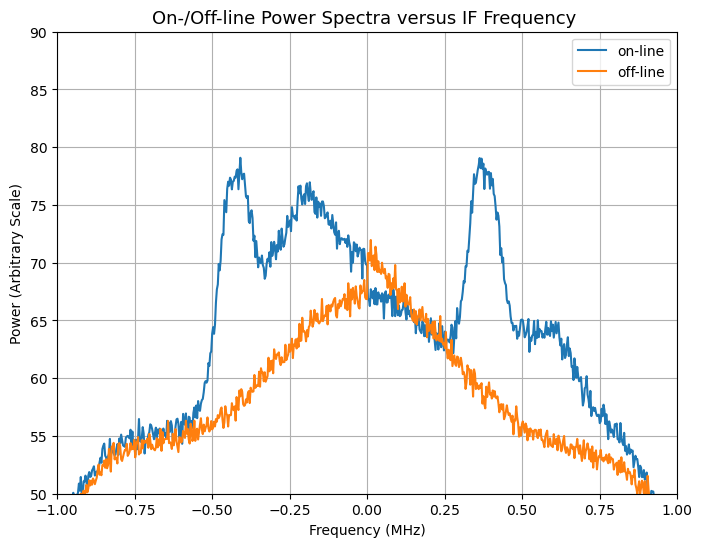

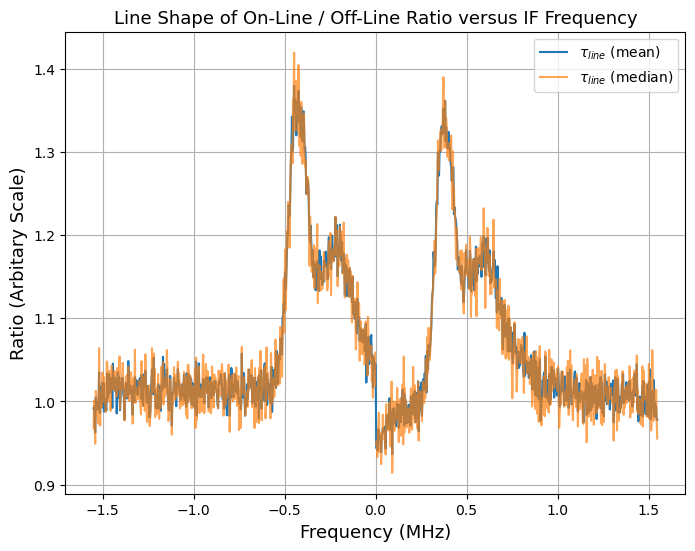

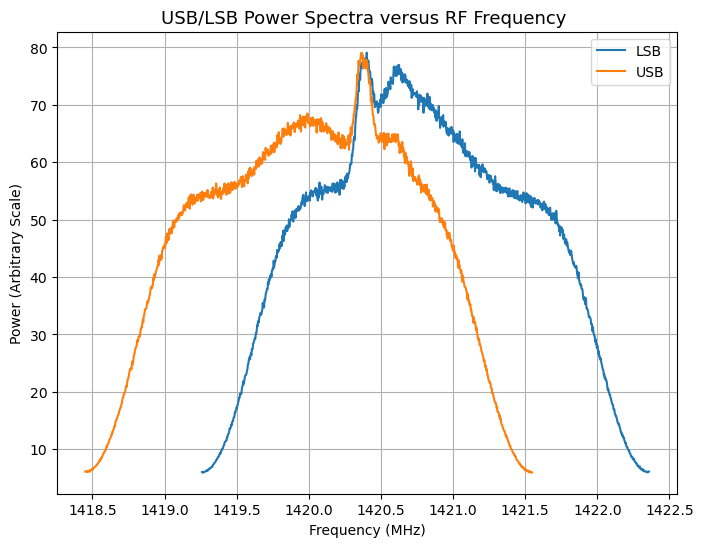

In [23]:
USB_aimed = getDataBlocks(data_USB_aimed)
LSB_aimed = getDataBlocks(data_LSB_aimed)
sample_rate = 3.1e6
center_freqs = ["1.42000 GHz", "1.42081 GHz"]


tau_mean, tau_median = graphAvgPowerSpectraLinesSingle(USB_aimed, LSB_aimed, sample_rate, xlim=(-1, 1), ylim=(50, 90))
graphTauLines(tau_mean, tau_median, sample_rate)

G = 127.366
T = tau_mean * G
graphPowerSpectraRF(USB_aimed, LSB_aimed, sample_rate)


In [24]:
print(f"jd = {getJulianDate(data_LSB_aimed)}")
time_utc = getUTC(data_LSB_aimed)
print(time_utc)
jd = 2460728.5492431596
az, alt = 298, 55
ra, dec = horizontalToEquitorial(az, alt, time_utc)
ra, dec = 6.450884 / 15, 62.725549
projected_v = ugradio.doppler.get_projected_velocity(ra, dec, jd)
print(projected_v)

jd = 2460728.5492431596
Sat Feb 22 01:10:54 2025
-16003.790786001207


poly_coeffs = [-2.07904879e-15 -7.54193329e-10 -4.93085329e-05  1.31464911e+02]
Chi-squared (baseline fit): 658.0619456095549
Reduced Chi-squared (baseline fit): 2.1365647584725806
[amplitude, center, width]
gaussian1 params = [ 1.73763423e+01 -1.79975879e+04  2.28207963e+04]
gaussian2 params = [   39.67763487 20837.12839673 10974.10610392]
Parameter 0: 17.38+/-0.34
Parameter 1: (-1.95+/-0.07)e+04
Parameter 2: (2.14+/-0.08)e+04
Parameter 3: 37.9+/-0.6
Parameter 4: (2.254+/-0.018)e+04
Parameter 5: (9.49+/-0.19)e+03
naive peaks = 5856.091014944458 and -38364.660985710434
46
corrected peak = 21859.881800945666
16003.79078600121
Chi-squared: 504.27311077776653
Reduced Chi-squared: 1.0166796588261422


<Figure size 800x600 with 0 Axes>

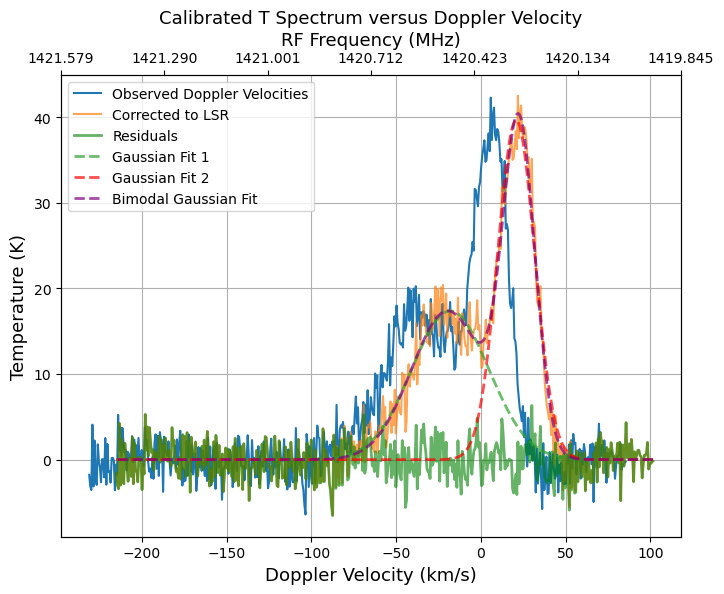

In [25]:
#graphCalibratedT(T, xlim=(1420, 1421))
graphCalibratedTDoppler2(T, projected_v)
#graphCalibratedTPolyfit(T, xlim=(1420, 1421.2))

In [26]:
# Window of 0.00297 to 0.00298 to scale voltage counts
print(getTimes(1024)[921])
print(getTimes(1024)[925])

0.0002970967741935484
0.00029838709677419353


c:\Users\brand\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\brand\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\brand\anaconda3\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


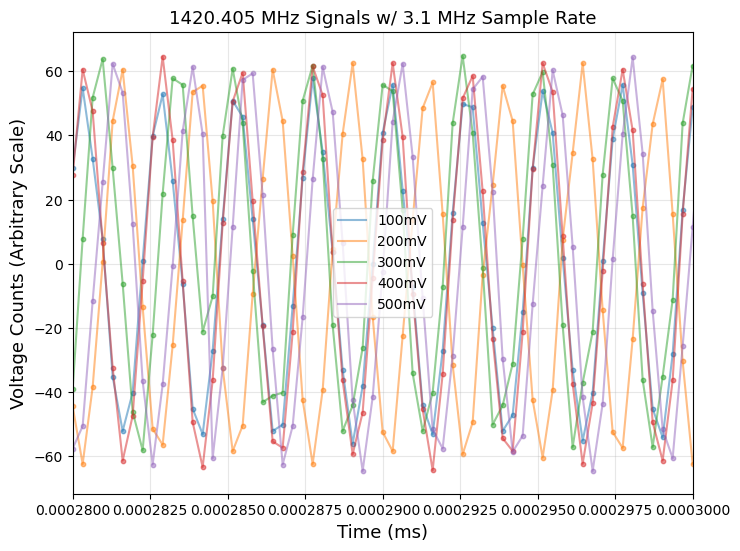

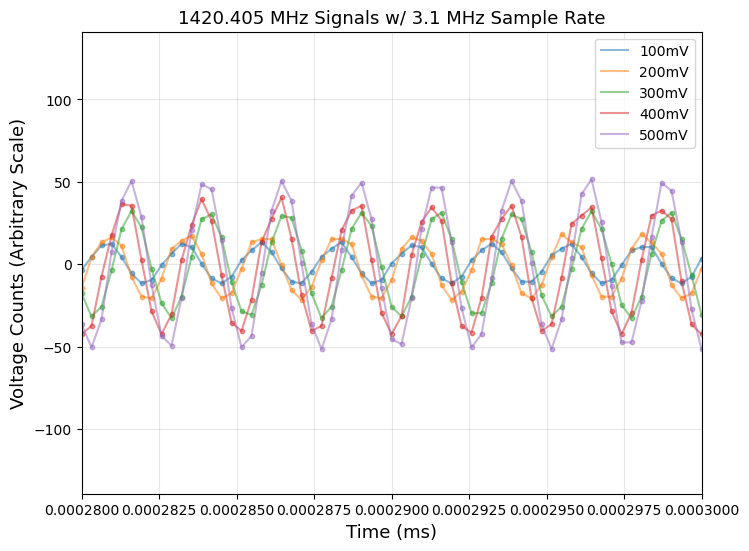

100mV max count = 56.333422847917454
200mV max count = 55.49769416521136
300mV max count = 60.65603542535593
400mV max count = 60.550234321184945
500mV max count = 64.78886429183561
100mV max count = 12.37648143956074
200mV max count = 19.81452852087214
300mV max count = 31.04680275296702
400mV max count = 39.72769394485215
500mV max count = 38.293133643562975


In [27]:
datasets = [data_100mV_short, data_200mV_short, data_300mV_short, data_400mV_short, data_500mV_short]
data = [getDataSingleBlock(i) for i in datasets]
labels = ["100mV", "200mV", "300mV", "400mV", "500mV"]

graphOverlayTimeData(data, labels, "1420.405 MHz", xlim=(0.00028, 0.0003))

datasets = [data_100mV_long, data_200mV_long, data_300mV_long, data_400mV_long, data_500mV_long]
data = [getDataSingleBlock(i) for i in datasets]
graphOverlayTimeData(data, labels, "1420.405 MHz", xlim=(0.00028, 0.0003))


# Window of 0.00297 to 0.00298 to scale voltage counts
datasets = [data_100mV_short, data_200mV_short, data_300mV_short, data_400mV_short, data_500mV_short]
datasets = [getDataSingleBlock(i) for i in datasets]
for i, data in enumerate(datasets):
    count = np.linalg.norm(max(data[921:926]))
    print(f"{labels[i]} max count = {count}")

datasets = [data_100mV_long, data_200mV_long, data_300mV_long, data_400mV_long, data_500mV_long]
datasets = [getDataSingleBlock(i) for i in datasets]
for i, data in enumerate(datasets):
    count = np.linalg.norm(max(data[921:926]))
    print(f"{labels[i]} max count = {count}")


In [28]:
print(len(tau_mean))
print(np.argmax((tau_mean[512:])))
print(tau_mean[512+126])
print(((3 / 1024) * 126) + 1420)

print(np.argmax((tau_mean[512+170:])))
print(tau_mean[512+170+26])
print(((3/1024)*196) + 1420)


1024
126
1.3617955010382983
1420.369140625
26
1.1983377791586312
1420.57421875


Chi-squared: 6.000000000000001
Reduced Chi-squared: 1.2000000000000002
Chi-squared: 6.000000000000003
Reduced Chi-squared: 1.2000000000000006
avg power loss (dB) = 16.767740425163456
avg power loss per meter = 2.39183790156959
avg power loss per meter sigma = 0.31
avg counts per mV (short) = 0.5474753546358097
counts per mV short sigma = 0.39300595598193305
avg counts per mV (long) = 0.07996150798517145
counts per mV short sigma = 0.1289744753447978
avg a val = -0.27537051485061487
avg mvs/count SDR = 2.3589843930655965
sigma = 0.507


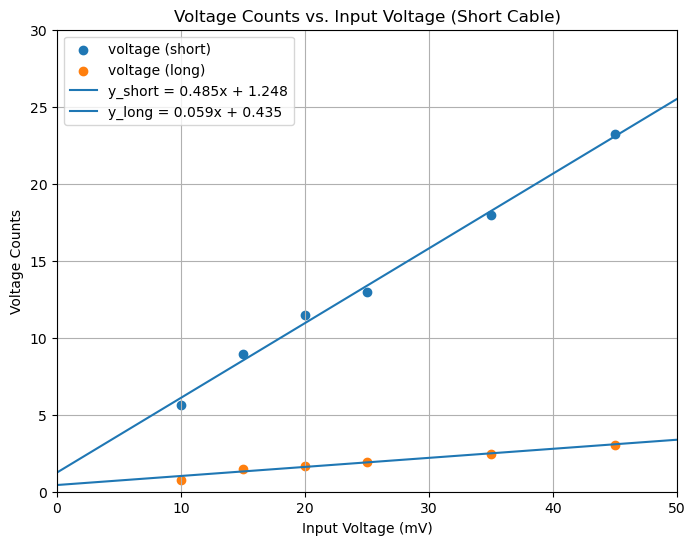

In [81]:
def signal_loss(x, voltage, loss_per_m):
    return loss_per_m * x + voltage

def normalize_voltage(data):
    return [np.linalg.norm(i) for i in data]

#data_short = [data_10mV, data_15mV, data_20mV, data_25mV, data_30mV, data_35mV, data_40mV, data_45mV]
data_short = [data_10mV, data_15mV, data_20mV, data_25mV, data_35mV, data_45mV]
datasets_short = [getDataSingleBlock(d, 60) for d in data_short]
#labels_short = ["10mV", "15mV", "20mV", "25mV", "30mV", "35mV", "40mV", "45mV"]
labels_short = ["10mV", "15mV", "20mV", "25mV", "35mV", "45mV"]

data_long = [data_10mV_long, data_15mV_long, data_20mV_long, data_25mV_long, data_35mV_long, data_45mV_long]
datasets_long = [getDataSingleBlock(d, 60) for d in data_long]
labels_long = ["10mV", "15mV", "20mV", "25mV", "35mV", "45mV"]

#x_short = [10, 15, 20, 25, 30, 35, 40, 45]
x_short = np.fromiter([10, 15, 20, 25, 35, 45], dtype="float")
x_long = np.fromiter([10, 15, 20, 25, 35, 45], dtype="float")
y_short = np.zeros(len(datasets_short))
y_long = np.zeros(len(datasets_long))

# Window of 0.00297 to 0.00298 to scale voltage counts
win = (921, 926)
for i, data in enumerate(datasets_short):
    #count = max(normalize_voltage(data)[win[0]:win[1]])
    count = np.percentile(normalize_voltage(data), 95)
    y_short[i] = count

for i, data in enumerate(datasets_long):
    #count = max(normalize_voltage(data)[win[0]:win[0]])
    count = np.percentile(normalize_voltage(data), 95)
    y_long[i] = count

linear_short = linregress(x_short, y_short)
slope_short = linear_short.slope
intercept_short = linear_short.intercept
point_short = (0, intercept_short)
residuals_s = y_short - (intercept_short + slope_short * x_short)
sigma_s = np.std(residuals_s)
chi_squared_s = np.sum((residuals_s / sigma_s) ** 2)
print(f"Chi-squared: {chi_squared_s}")
reduced_chi_squared_s = chi_squared_s / (len(x_short) - 1)
print(f"Reduced Chi-squared: {reduced_chi_squared_s}")

linear_long = linregress(x_long, y_long)
slope_long = linear_long.slope
intercept_long = linear_long.intercept
point_long = (0, intercept_long)
residuals_l = y_long - (intercept_long + slope_long * x_long)
sigma_l = np.std(residuals_l)
chi_squared_l = np.sum((residuals_l / sigma_l) ** 2)
print(f"Chi-squared: {chi_squared_l}")
reduced_chi_squared_l = chi_squared_l / (len(x_long) - 1)
print(f"Reduced Chi-squared: {reduced_chi_squared_l}")

# Power Loss Computation
l_s, l_l = 0.9144, 7.9248
delta_l = abs(l_l - l_s)
R = 50
p_short = ((y_short * 2.05) ** 2) / R
p_long = ((y_long * 2.05) ** 2) / R
power_loss_dB = 10 * np.log10(p_short / p_long)
power_loss_per_unit_l = power_loss_dB / delta_l
print(f"avg power loss (dB) = {np.average(power_loss_dB)}")
print(f"avg power loss per meter = {np.average(power_loss_per_unit_l)}")
print(f"avg power loss per meter sigma = {0.31}")
counts_per_mV_short = y_short / x_short
print(f"avg counts per mV (short) = {np.average(counts_per_mV_short)}")
print(f"counts per mV short sigma = {sigma_s}")
counts_per_mV_long = y_long / x_long
print(f"avg counts per mV (long) = {np.average(counts_per_mV_long)}")
print(f"counts per mV short sigma = {sigma_l}")

# (mv/count)_short = (mv/count)_SDR * e^(a * L_short)
# (mv/count)_long = (mv/count)_SDR * e^(a * L_long)
# a = log((mv/count)_short / (mv/count)_long) / (L_short - L_long)
mvs_per_count_short = 1 / counts_per_mV_short
mvs_per_count_long = 1 / counts_per_mV_long

a = np.log((mvs_per_count_short / mvs_per_count_long)) / delta_l
print(f"avg a val = {np.average(a)}")
mVs_per_count_SDR_s = mvs_per_count_short / (np.exp(a*l_s))
mVs_per_count_SDR_l = mvs_per_count_long / (np.exp(a*l_l))
print(f"avg mvs/count SDR = {np.average(mVs_per_count_SDR_s)}")
print(f"sigma = 0.507")

plt.figure(figsize=graphSizeSingle)

plt.scatter(x_short, y_short, label="voltage (short)")
plt.scatter(x_long, y_long, label="voltage (long)")
plt.axline(point_short, slope=slope_short, label=f'y_short = {round(slope_short, 3)}x + {round(intercept_short, 3)}')
plt.axline(point_long, slope=slope_long, label=f'y_long = {round(slope_long, 3)}x + {round(intercept_long, 3)}')

plt.grid()
plt.legend()
plt.title("Voltage Counts vs. Input Voltage (Short Cable)")
plt.xlabel("Input Voltage (mV)")
plt.ylabel("Voltage Counts")
plt.xlim(0, 50)
plt.ylim(0, 30)
plt.show()



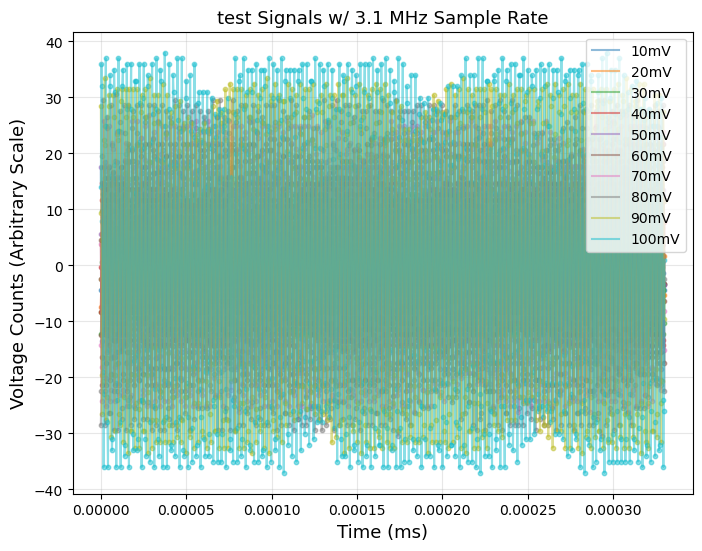

x = [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[ 4.65425395  8.84130507 12.97239373 15.53322636 19.20121959 22.72763706
 26.2286934  30.04111627 33.78054361 37.54318506]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Chi-squared: 10.000000000000002
Reduced Chi-squared: 1.1111111111111114
avg mV per count  = 2.52020733474708
sigma = 0.33197191231749207
G = -0.6073681783908917 +- 3.0825745020688826
G_min = -3.2300712103472073
G_max = 2.4752063236779906


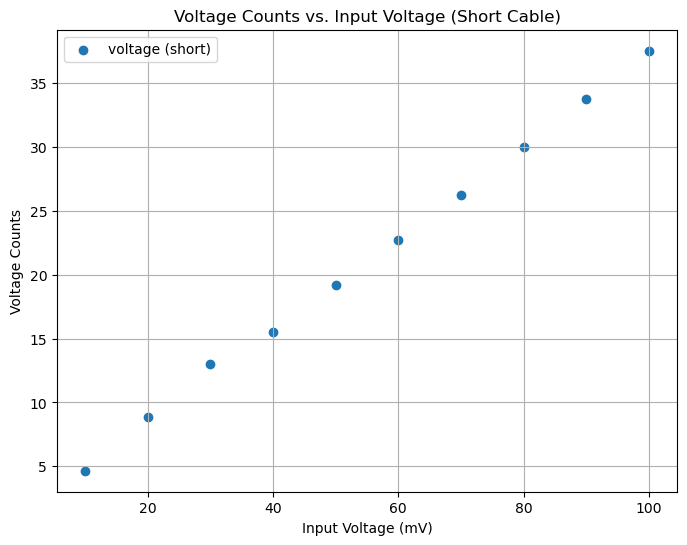

G = 1.808274811479429 +- 3.8151223736995634
G_min = -2.0068475622201345
G_max = 2.4350007852439957


In [86]:
data = [data_bp_10mV, data_bp_20mV, data_bp_30mV, data_bp_40mV, data_bp_50mV, data_bp_60mV, data_bp_70mV, data_bp_80mV, data_bp_90mV, data_bp_100mV]
datasets = [getDataSingleBlock(d, 40) for d in data]
labels = ["10mV", "20mV", "30mV", "40mV", "50mV", "60mV", "70mV", "80mV", "90mV", "100mV"]

graphOverlayTimeData(datasets, labels, "test")

x_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x = np.fromiter(x_vals, dtype="float")
print(f"x = {x}")
y = np.zeros(len(datasets))
y_percentile = np.zeros(len(datasets))
# Window of 0.00297 to 0.00298 to scale voltage counts
for i, data in enumerate(datasets):
    norm_data = [np.linalg.norm(i) for i in data]
    #y[i] = max(norm_data[900:940])
    y[i] = np.percentile(norm_data, 95)
print(y)
print(y_percentile)

linear = linregress(x, y)
slope = linear.slope
intercept = linear.intercept
point = (0, intercept)
residuals = y - (intercept + slope * x)
sigma = np.std(residuals)
chi_squared = np.sum((residuals / sigma) ** 2)
print(f"Chi-squared: {chi_squared}")
reduced_chi_squared = chi_squared / (len(x) - 1)
print(f"Reduced Chi-squared: {reduced_chi_squared}")

counts_per_mv = y/x
mVs_per_count = 1 / counts_per_mv
print(f"avg mV per count  = {np.average(mVs_per_count)}")
print(f"sigma = {sigma}")

G = 20 * np.log10(2.35 / np.average(mVs_per_count))
G_min = 20 * np.log10(1.84 / np.max(mVs_per_count))
G_max = 20 * np.log10(2.857 / np.min(mVs_per_count))

print(f"G = {G} +- {max(abs(G_min - G), abs(G - G_max))}")
print(f"G_min = {G_min}")
print(f"G_max = {G_max}")

plt.figure(figsize=graphSizeSingle)

plt.scatter(x, y, label="voltage (short)")

plt.grid()
plt.legend()
plt.title("Voltage Counts vs. Input Voltage (Short Cable)")
plt.xlabel("Input Voltage (mV)")
plt.ylabel("Voltage Counts")
plt.xlim()
plt.ylim()
plt.show()

R=50
P_in = [(V**2 / R) for V in x_vals]
P_out = ((y * 2.35) * (10**(2.39/20))) **2 / R
P_out_min = ((y * 1.84) * (10**(2.08/20))) **2 / R
P_out_max = ((y * 2.857) * (10**(2.70/20))) **2 / R

G = np.average(10 * np.log10(P_out / P_in))
G_min = np.average(10 * np.log10(P_out / P_out_max))
G_max = np.average(10 * np.log10(P_out / P_out_min))

print(f"G = {G} +- {max(abs(G_min - G), abs(G - G_max))}")
print(f"G_min = {G_min}")
print(f"G_max = {G_max}")